<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Day_12_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Day 11 & 12 Assignment - Telco Churn Analytic**
- Using the OSEMN framework to perform churn analysis on the telco dataset 
- Perform EDA and decision tree classification 

In [1]:
# Import Libraries
import pandas as pd 
import seaborn as sns 

# Obtain Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/telco_customer_churn_dataset.csv")
df.shape

(7043, 21)

In [3]:
# Observe the first 10 rows of data 
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

# Scrub Data

In [4]:
# This function is used to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# From the df.info, the total charges suspose to be dtype of float or int
# hence, need to convert to numeric data type, "coerce" means setting the non number to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Setting the binary value - (No -> 0) and (Yes -> 1)
binary_columns = ["Partner", "PhoneService", "Dependents", "PaperlessBilling", "Churn"]

for column in binary_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [9]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Setting the nominal value to binary value according to the type 
df['gender'] = df['gender'].map({"Female": 0, "Male": 1})

In [11]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
df['MultipleLines'] = df['MultipleLines'].map({"No": 0, "Yes": 1, "No phone service":0})
df['MultipleLines'].unique()

array([0, 1])

In [13]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:
# As the nominal value for 'Internet Service' is unique hence cannot simply set 0 or 1 
# need to separate the nominal data into individual column and set to binary value 
df = pd.get_dummies(data=df, columns=['InternetService'])
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [17]:
df['OnlineBackup'] = df['OnlineBackup'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
df['DeviceProtection'] = df['DeviceProtection'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df['TechSupport'] = df['TechSupport'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df['StreamingTV'] = df['StreamingTV'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array([0, 1])

In [24]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df['StreamingMovies'] = df['StreamingMovies'].map({"No": 0, "Yes": 1, "No internet service":0})
df['StreamingTV'].unique()

array([0, 1])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7043 non-null   object 
 1   gender                       7043 non-null   int64  
 2   SeniorCitizen                7043 non-null   int64  
 3   Partner                      7043 non-null   int64  
 4   Dependents                   7043 non-null   int64  
 5   tenure                       7043 non-null   int64  
 6   PhoneService                 7043 non-null   int64  
 7   MultipleLines                7043 non-null   int64  
 8   OnlineSecurity               7043 non-null   int64  
 9   OnlineBackup                 7043 non-null   int64  
 10  DeviceProtection             7043 non-null   int64  
 11  TechSupport                  7043 non-null   int64  
 12  StreamingTV                  7043 non-null   int64  
 13  StreamingMovies   

In [27]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0             0              0               0             1  ...   
1             1              0               1             0  ...   
2             1              0               1             1  ...   
3             0              0               1             0  ...   
4             1              0               0             0  ...   

   StreamingMovies        Contract  PaperlessBilling  \
0                0  Month-to-month                 1   
1                0        One year                 0   
2                0  Month-to-month                 1   
3                0        One year                 0   
4                0  Month-to-month                 1   

               PaymentMethod MonthlyCharges  TotalCharges Churn  \
0           Electronic check          29.85         29.85     0   
1               Mailed check          56.95       1889.50     0   
2               Mailed check          53.85        108.15     1   
3  Bank transfer (automatic)          42.30       1840.75     0   
4           Electronic check          70.70        151.65     1   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  
0                    1                            0                   0  
1                    1                            0                   0  
2                    1                            0                   0  
3                    1                            0                   0  
4                    0                            1                   0  

[5 rows x 23 columns]

# Explore Data

In [28]:
# Check missing values 
df.isnull().sum()

customerID                      0
gender                          0
SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
MultipleLines                   0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Contract                        0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                   11
Churn                           0
InternetService_DSL             0
InternetService_Fiber optic     0
InternetService_No              0
dtype: int64

In [29]:
df = df.dropna()

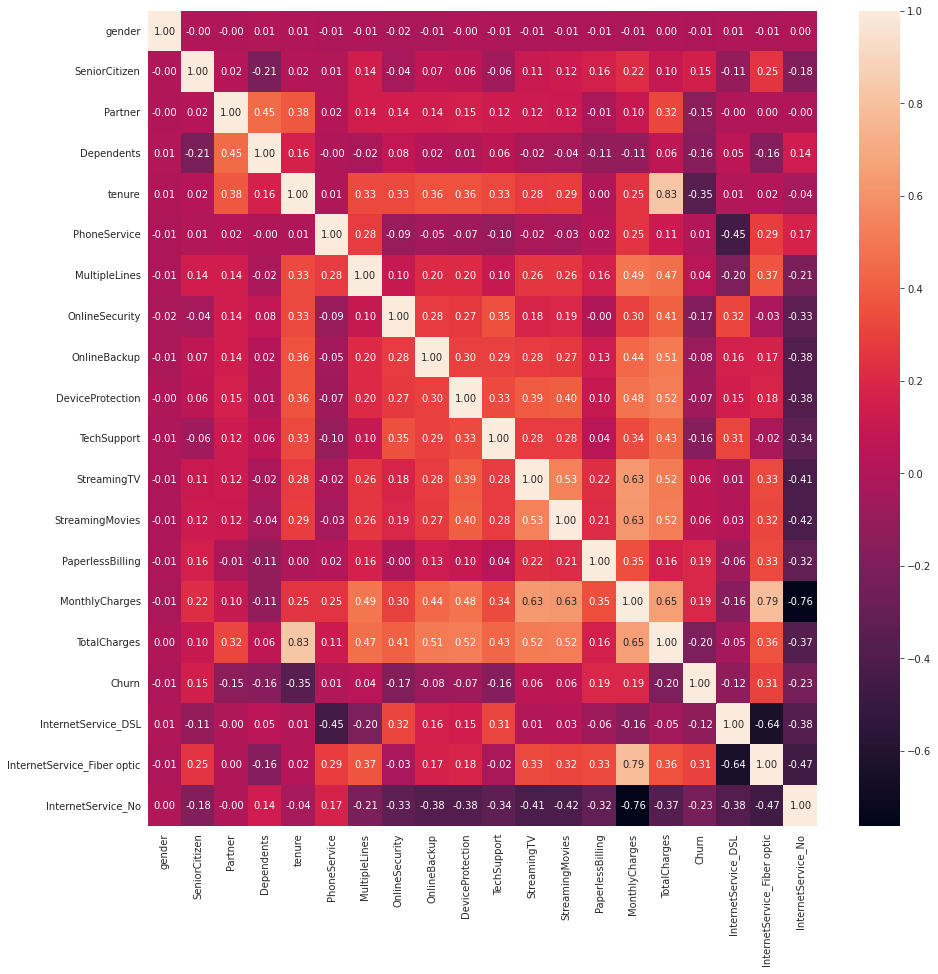

In [30]:
# Check the correlation 
sns.set({"figure.figsize": (15, 15)})

corr = df.corr()
sns.heatmap(corr, annot = True, fmt = ".2f")

- The target variable = Churn 
- It can be seen that the InternetServece_FiberOptic has the highest correlation with the churn 
- Then it is paperless billing, monthly charges and senior citizen count where this three particular is positively correlated with the churn 
- and also it is worth to note that tenure is negatively correlated with the churn, this is because the higher the tenure, it also represent how long the person will commit to the telco 

In [31]:
# Descriptive Analytic Summary
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7032.000000    7032.000000     7032.000000   7032.000000   
mean       0.903299       0.421928        0.286547      0.344852   
std        0.295571       0.493902        0.452180      0.475354   
min        0.000000       0.000000        0.000000      0.000000   
25%        1.000000       0.000000        0.000000      0.000000   
50%        1.000000       0.000000        0.000000      0.000000   
75%        1.000000       1.000000        1.000000      1.000000   
max        1.000000       1.000000        1.000000      1.000000   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
count       7032.000000  7032.000000  7032.000000      7032.000000   
mean           0.343857     0.290102     0.384386         0.388367   
std            0.475028     0.453842     0.486484         0.487414   
min            0.000000     0.000000     0.000000         0.000000   
25%            0.000000     0.000000     0.000000         0.000000   
50%            0.000000     0.000000     0.000000         0.000000   
75%            1.000000     1.000000     1.000000         1.000000   
max            1.000000     1.000000     1.000000         1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges        Churn  \
count       7032.000000     7032.000000   7032.000000  7032.000000   
mean           0.592719       64.798208   2283.300441     0.265785   
std            0.491363       30.085974   2266.771362     0.441782   
min            0.000000       18.250000     18.800000     0.000000   
25%            0.000000       35.587500    401.450000     0.000000   
50%            1.000000       70.350000   1397.475000     0.000000   
75%            1.000000       89.862500   3794.737500     1.000000   
max            1.000000      118.750000   8684.800000     1.000000   

       InternetService_DSL  InternetService_Fiber optic  InternetService_No  
count          7032.000000                  7032.000000         7032.000000  
mean              0.343572                     0.440273            0.216155  
std               0.474934                     0.496455            0.411650  
min               0.000000                     0.000000            0.000000  
25%               0.000000                     0.000000            0.000000  
50%               0.000000                     0.000000            0.000000  
75%               1.000000                     1.000000            0.000000  
max               1.000000                     1.000000            1.000000

For continuous data (tenure, monthly charges, total charges)
- the mean and median value shows that the total charges has a large different 
- notable large different on the 75% and max value for the total charges as well
- from the two points high number of outliers could be noticed on the total charges  

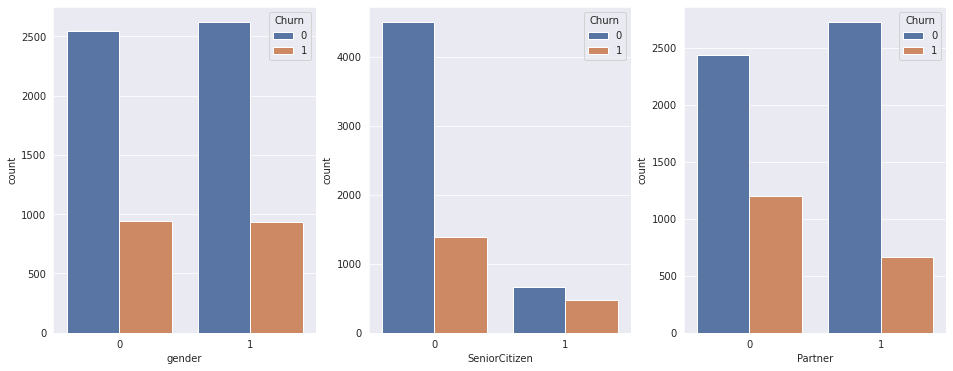

In [32]:
# Using the counterplot to observe the relationship of the variable correspond to the churn rate 
# while for continuous data will be using boxplot  
from matplotlib import pyplot as plt

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

- The gender doesn't affect the churn 
- Senior citizen is much likely to churn (this could be due to the unadaptability / unwillingness to the new technology of smartphone and the Internet, hence churn to not using it. Besides, they would be mostly using landline communication too.)
- Citizen with partner is less likely to churn (as they would just stick with their existing family plan and package etc)

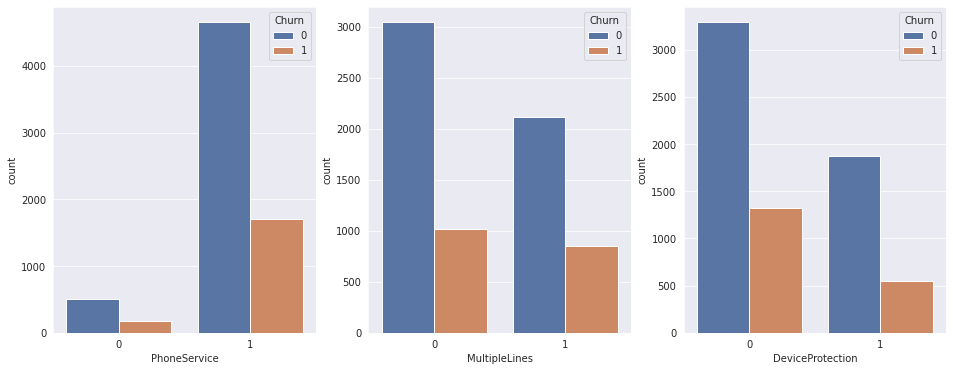

In [33]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

- The churn is higher when there is phone service provided
- The churn is higher when there is mulitple line provided  
- The churn is higher when there is no device protection provided  

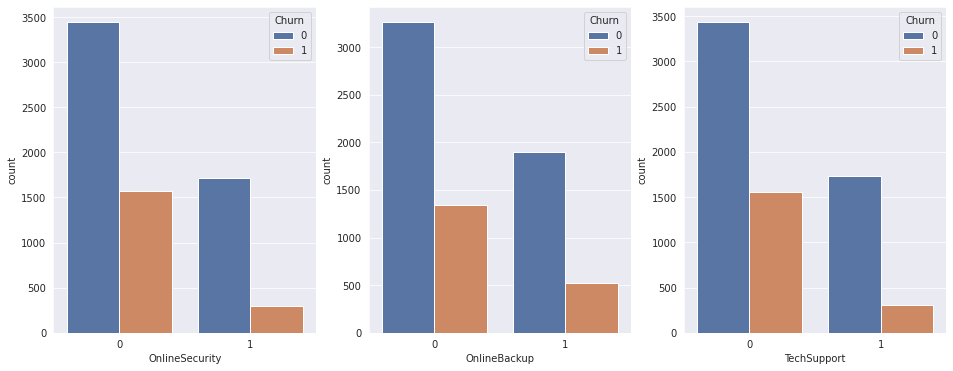

In [34]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

- The churn is higher when no online security is provided  
- The churn is higher when no online backup is provided 
- The churn is higher when no tech support is provided

- From the points above, it can see that people would more likely to churn when they are not subscribed to extra services. 

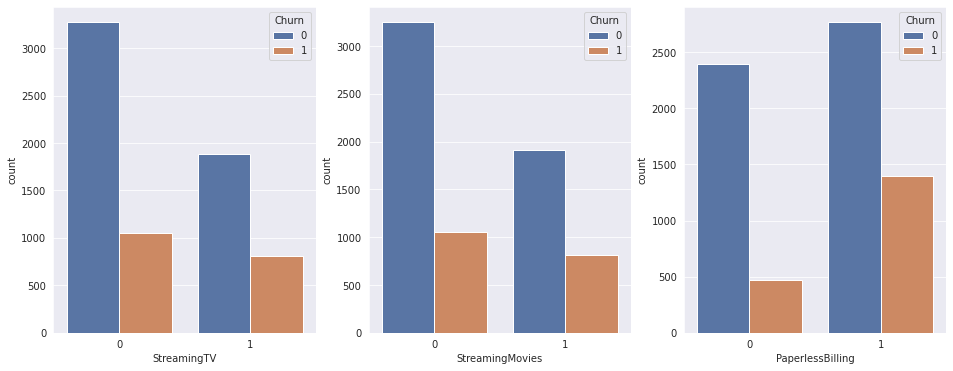

In [35]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

- The churn for streaming TV and streaming movies is looking ok 
- The churn is higher when there is paperless billing (this is surprising)

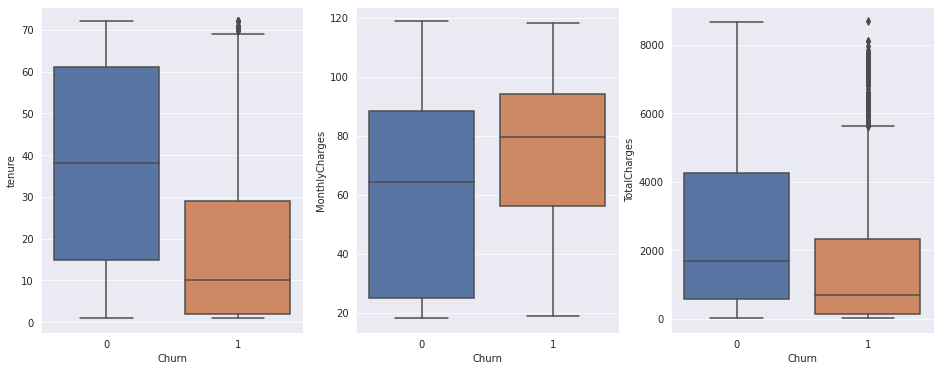

In [36]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

- Most customer churn happens at 10 months of the tenure 
- Customer with higher monthly charges are more likely to churn  
- However, the total charges shows a lower churn rate when the total charges is lower. 

# Model Data 

In [37]:
# Build decision tree classifier 
# Listing the necessary dataset 
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity', 
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges' ]

In [38]:
train_data = df[columns]
train_labels = df['Churn']

In [39]:
# Split the data into train and test set 
# 70% of training data, 30% of testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

In [40]:
# Build the decision tree classifier model 
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

In [41]:
# Check the accuracy performance of the model 
from sklearn import metrics
y_pred = model.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795260663507109


In [42]:
# Draw the decision tree using graphviz 
import graphviz
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'] ,filled = True, rounded = True)

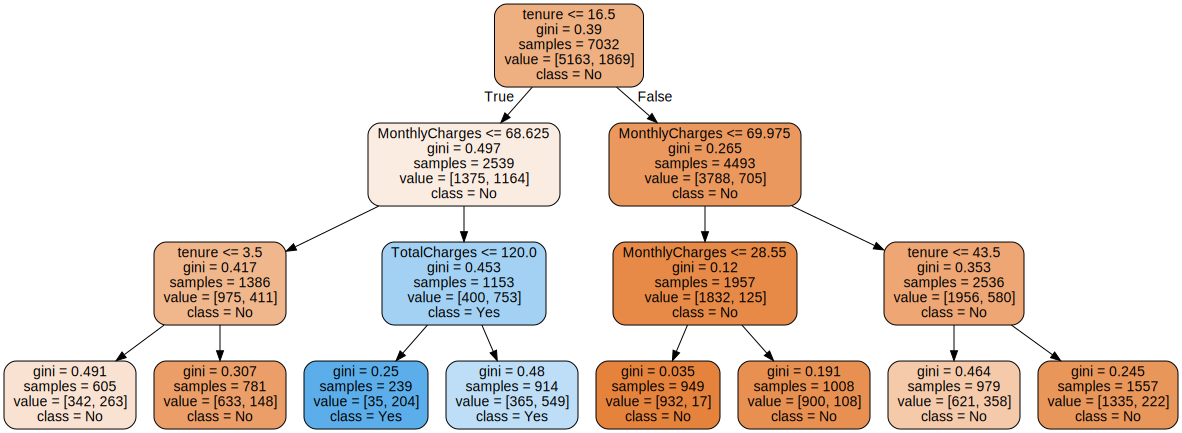

In [43]:
# Display the tree 
graph = graphviz.Source(dot_data)
graph

In [44]:
# Using the model to predict the churn according to the variables
df_predict = train_data.iloc[0:0].copy()

In [45]:
df_predict = df_predict.append({
    "SeniorCitizen": 0,
    "Partner":0,
    "PhoneService":1,
    "DeviceProtection": 1,
    "OnlineSecurity": 0,
    "OnlineBackup":0,
    "TechSupport":1,
    "PaperlessBilling":1,
    "tenure": 12,
    "MonthlyCharges":50,
    "TotalCharges":70
}, ignore_index=True)

In [46]:
df_predict

SeniorCitizen  Partner  PhoneService  DeviceProtection  OnlineSecurity  \
0              0        0             1                 1               0   

   OnlineBackup  TechSupport  PaperlessBilling  tenure  MonthlyCharges  \
0             0            1                 1      12            50.0   

   TotalCharges  
0          70.0

In [47]:
model.predict(df_predict)

array([0])

# Adjust The Model for Higher Accuracy

In [64]:
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity', 
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges' ]

train_data = df[columns]
train_labels = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth = 35)
model.fit(train_data, train_labels)

y_pred = model.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9909952606635071


- Adjusted the max_depth of the tree from 3 to 35 
- The accuracy improved to 0.99 = 99% 

In [66]:
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'] ,filled = True, rounded = True)

graph = graphviz.Source(dot_data)
graph